## Error Check

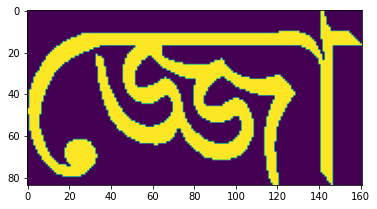

In [1]:
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont
import matplotlib.pyplot as plt
%matplotlib inline 
import os 
import cv2
import numpy as np


def stripPads(arr,val):
    '''
      strip specific values
    '''
    arr=arr[~np.all(arr == val, axis=1)]
    arr=arr[:, ~np.all(arr == val, axis=0)]
    return arr

def show_grapheme(char):
    HEIGHT = 256
    WIDTH = 256
    image = Image.new('RGB', (WIDTH, HEIGHT))
    draw = ImageDraw.Draw(image)
    myfont = ImageFont.truetype('/home/apsisdev/ansary/synthdata/__notes__/Bangla.ttf', 128)
    w, h = draw.textsize(char, font=myfont)
    draw.text(((WIDTH - w) / 2,(HEIGHT - h) / 2), char, font=myfont)
    image=image.convert('L')

    image=np.array(image)
    image[image <= 128]=0
    image[image > 128]=255

    image=stripPads(image,0)
    plt.imshow(image)
    plt.show()
    
show_grapheme("জ্জো")

In [2]:
from coreLib.dataset import DataSet
data_dir       = "/home/apsisdev/ansary/sourcedata/"
ds=DataSet(data_dir)
ds.common.symbols.df

 38%|███▊      | 76093/200840 [00:00<00:00, 760927.10it/s]

#LOG     :All paths found


  2%|▏         | 17107/1059977 [00:00<00:11, 88885.33it/s]

#LOG     :Processing Dictionary:/home/apsisdev/ansary/sourcedata/bangla/dictionary.csv


100%|██████████| 10305/10305 [00:00<00:00, 1393279.05it/s]


#LOG     :converting int labels to string


  2%|▏         | 7884/370098 [00:00<00:04, 78836.88it/s]

#LOG     :Processing Dictionary:/home/apsisdev/ansary/sourcedata/english/dictionary.csv


100%|██████████| 5975/5975 [00:00<00:00, 749856.87it/s]


#LOG     :bangla.graphemes


100%|██████████| 2682/2682 [00:00<00:00, 6715894.52it/s]

#LOG     :bangla.numbers
#LOG     :english.graphemes
#LOG     :english.numbers
#LOG     :common.symbols
#LOG     :bangla.fonts
#LOG     :english.fonts



100%|██████████| 3240/3240 [00:00<00:00, 6332499.98it/s]


#LOG     :common.background
#LOG     :common.noise.random
#LOG     :common.noise.sign


,filename,label,img_path
0,symbol_0,>,/home/apsisdev/ansary/sourcedata/common/symbol...
1,symbol_1,>,/home/apsisdev/ansary/sourcedata/common/symbol...
2,symbol_2,>,/home/apsisdev/ansary/sourcedata/common/symbol...
3,symbol_3,>,/home/apsisdev/ansary/sourcedata/common/symbol...
4,symbol_4,>,/home/apsisdev/ansary/sourcedata/common/symbol...
...,...,...,...
5970,symbol_5970,<,/home/apsisdev/ansary/sourcedata/common/symbol...
5971,symbol_5971,<,/home/apsisdev/ansary/sourcedata/common/symbol...
5972,symbol_5972,<,/home/apsisdev/ansary/sourcedata/common/symbol...
5973,symbol_5973,<,/home/apsisdev/ansary/sourcedata/common/symbol...


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline 
import os 
import cv2
import numpy as np

from __notes__.memo_utils import memoHeadFunc
from coreLib.word import create_word

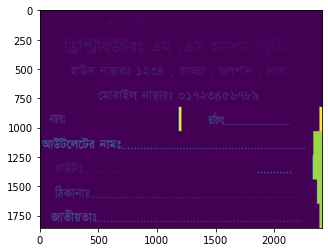

In [5]:
### Call Function: memoHeadFunc()

head_names=[
               "এ.স. এন্টারপ্রাইজ",
               "ড্রিস্ট্রিবিউটরঃ এম/এস হাশেম ট্রেডিং",
               "হাউস নাম্বারঃ ১২৩৪, বাড্ডা, গুলশান, ঢাকা।",    
               "মোবাইল নাম্বারঃ ০১৭২৩৪৫৬৭৮৯",
               "নাম্বারঃ",
               "তারিখঃ"
               ] 

head_var_names=[
                
               "আউটলেটের নামঃ",
               "রাউটঃ",
               "ঠিকানাঃ",
               "জাতীয়তাঃ"
                
                ]

class_map_csv='/home/apsisdev/ansary/synthdata/PoC/__notes__/class_map.csv'
font_path='/home/apsisdev/ansary/synthdata/PoC/__notes__/Bangla.ttf'

# # head_iden_list, no_date_iden_list
# _lst: iden value for placing image on head_var_name
# _lst_dn: iden value for placing image on "নাম্বারঃ", "তারিখঃ"

final_image, _lst, _lst_dn=memoHeadFunc(
                                          head_names,
                                          head_var_names,
                                          class_map_csv_path=class_map_csv,
                                          font_path=font_path)

plt.imshow(final_image)
plt.show()

# __final_image = final_image
# ### Clean View
# __final_image[__final_image>0]=255
# plt.imshow(__final_image)
# plt.show()

In [6]:
# imgss = []
# for i in range(2, 5):
#     img,label,iden=create_word(i,
#                             "bangla",
#                             "handwritten",
#                             "graphemes",
#                             ds,
#                             use_dict=True)
#     imgss.append(img)

# print(len(imgss))
# # no_date_iden_list = [i for i in range(655+len(head_names)-2,len(head_names)+655)]

# #     img,label,iden=create_word(i,"bangla","handwritten","graphemes",ds,use_dict=True)
    
# # Lst = [addMulDiv(i, 500)[0] for i in range(1, 10)]

In [7]:
# imgs_head_var_names = [create_word(i,"bangla","handwritten","graphemes",ds,use_dict=True)[0] for i in range(1, len(_lst)+1)]
# print(len(imgs_head_var_names))

In [8]:
# imgs_num_date = [create_word(i,"bangla","handwritten","number",ds,use_dict=True)[0] for i in range(1, len(_lst_dn)+1)]
# print(len(imgs_num_date))

In [9]:
def placeImageOnBackground(img,back,bbox):
    '''
        @author
        places a specific image on a given background at a specific location
        args:
            img   :   greyscale image to place
            back  :   background to place the image
            bbox  :   coordinate of bbox i.e., (y_min,y_max,x_min,x_max)
        location constraint:
            the bounding box centering the (x,y) point can be random
        return:
            back  :   back image after placing 'img'
    '''
    (y_min, y_max, x_min, x_max) = bbox
    ## back: ignore lines of table
    back[y_min:y_max,x_min:x_max]=0
    ## img: resize image
    h_max = abs(y_max-y_min)
    w_max = abs(x_max-x_min)
    dim = (h_max, w_max)
    _img = cv2.resize(img, dim[::-1], fx=0,fy=0, interpolation = cv2.INTER_NEAREST)
    ## place "img" on "back"
    back[y_min:y_max,x_min:x_max]=_img
    return back

In [10]:
def placeHandTextOnMemoHeadImage(memo_head_img,
                                 iden_list_head_var_names,
                                 iden_list_no_date,
                                 ds=ds
                                ):
    
    
    '''
        @author
        places a specific image on a given memo head image at a specific location
        args:
            memo_head_img            :   memo head image to place the image
            iden_list_head_var_names :   list of iden values for finding location of head_var_names (name, route, address)
            iden_list_no_date        :   list of iden values for finding location of number and date
            ds                       :   the dataset object
        location constraint:
            the bounding box centering the (x,y) point can be random
        return:
            memo_head_img            :   placing image given memo head image at a specific location.
    '''
    
    ## greyscale images to place (name, route, date)
    imgs_head_var_names = [create_word(i,"bangla","handwritten","graphemes",ds,use_dict=True)[0] for i in range(1, len(iden_list_head_var_names)+1)]
    # print(len(imgs_head_var_names))
    
    for i,img in zip(iden_list_head_var_names,imgs_head_var_names):
        idx = np.where(memo_head_img==i)
        h,w=img.shape
        y_min, y_max, x_min, x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
        
        ## resize image
        h_max = abs(y_max-y_min)
        w_max = abs(x_max-x_min)
        
        if w<x_min: 
            y_min, y_max, x_min, x_max=y_min, y_max, x_min-w, x_max
        else:
            y_min, y_max, x_min, x_max=y_min, y_max, x_min-w//2, x_max
            
        bbox = (y_min, y_max, x_min, x_max)
            
        memo_head_img=placeImageOnBackground(img,memo_head_img,bbox)
        
    ## greyscale images to place (number, date)
    imgs_num_date = [create_word(i,"bangla","handwritten","number",ds,use_dict=True)[0] for i in range(1, len(iden_list_no_date)+1)]
    # print(len(imgs_num_date))
        
    for i,img in zip(iden_list_no_date,imgs_num_date):
        idx = np.where(memo_head_img==i)
        h,w=img.shape
        y_min, y_max, x_min, x_max = np.min(idx[0]), np.max(idx[0]), np.min(idx[1]), np.max(idx[1])
        
        ## resize image
        h_max = abs(y_max-y_min)
        w_max = abs(x_max-x_min)
        
        if w<x_min: 
            y_min, y_max, x_min, x_max=y_min, y_max, x_min-w, x_max
        else:
            y_min, y_max, x_min, x_max=y_min, y_max, x_min-w//2, x_max
            
        bbox = (y_min, y_max, x_min, x_max)
            
        memo_head_img=placeImageOnBackground(img,memo_head_img,bbox)
            
    return memo_head_img

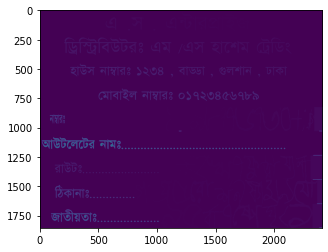

In [11]:
place_hand_text_on_head_img = placeHandTextOnMemoHeadImage(final_image, _lst, _lst_dn, ds=ds)

plt.imshow(place_hand_text_on_head_img)
plt.show()

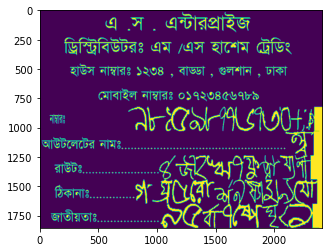

In [12]:
### Clean View
place_hand_text_on_head_img[place_hand_text_on_head_img>0]=255
plt.imshow(place_hand_text_on_head_img)
plt.show()